# <center> Estimation of Multinomial Logit model 
 

# 1.  Brief Review of MNL Estimation 

This aim of this problem is to show how to estimate unknown parameters $\theta$. So we focus on the estimation procedure and equations for programming although the estimation results can be evaluated by several Measurements.
In common, a discrete choice model has a form as follow
$$Y_{n} = f(Z,\beta) = f_{\xi}(\underbrace{x},\underbrace{\theta}) + \xi$$

In here, we usually know $f_{\xi}$ with certainly, but $\theta$ is totally unknown. Thus, by assuming the distributional properties of $\underbrace{\xi}$, we can estimate vector of parameters ($\theta$). When we assume the distribution of error term is a Gumbel distribution, the probability of selection alternative i can be calculated by following equation.

$$Y_{n} ~ (f_{\xi}(\underbrace{x},\underbrace{\theta})= Pr(i\lvert C_{n})= \frac{e^{V^{i}_{n}}}{\sum_{\forall j \in C_{n}e^{V^{j}_{n}}}}$$
Usually we call $V^{i}_{n}$ as an utility function and assume that the function has a linear combination.

To use this model, we should estimate the unknown parameters ($\theta$) which explains the observed the relationship between $y_{n}$ and $x_{n}$. To estimate unknown parameers, we calculate maximum likelihood of observed $y_{n}$ as follow:
$$\mathbf{L^{*}} = \prod^{N}_{n=1}f(\delta^{n}\lvert\underbrace{x^{n}},\underbrace{\theta}) $$ 

By applying log, the likelihood function can be converted to the summation format.
$$ ln\mathbf{L^{*}} = \sum_{n
=1}^{N}ln[f(\delta_{n}\lvert\underbrace{x^{n}},\hat{\theta}]    $$
$$ = \sum_{n=1}^{N} \sum_{\forall j \in C_{n}} ln[\frac{e^{V^{i}_{n}}}{\sum_{\forall j \in C_{n}}e^{V^{j}_{n}}}]^{\delta_{i}^{n}} $$
$$ = \sum_{n=1}^{N} \sum_{\forall j \in C_{n}} \delta_{i}^{n} [ \hat\theta^{'} \cdot x_{i}^{n}-ln \sum_{\forall j \in C_{n}}
e^{\hat\theta^{'} \cdot x_{i}^{n}} ] $$

To find maximum value of $\mathbf{L^{*}}$ we differentiate it as follow:
$$  max    \mathbf{L^{*}}  via \frac{\partial \mathbf{L^{*}}}{ \partial  \hat{\theta}_{k} } \lvert_{\vec{\theta_{n}}} = 0$$


Then to find maximum value we differentiate $\mathbf{L^{*}}$ by each $\hat{\theta}_{k}$ 
$$\frac{\partial \mathbf{L^{*}}}{ \partial  \hat{\theta}_{k} } \lvert_{\vec{\theta^{*}_{n}}} = 
\sum_{n=1}^{N} \sum_{\forall i \in C_{n}} \delta_{i}^{n} (x_{ki}^{n}-\frac{\sum_{\forall j \in C_{n}}  x^{n}_{kj} e^{\hat\theta^{'} \cdot x_{i}^{n}}}  {\sum_{\forall l \in C_{n}} e^{\hat\theta^{'} \cdot x_{l}^{n}}})
  = 0 ; k = 0, 1, 2,\dotsb ,p$$

where $$\delta_{i}^{n}=\left\{
                \begin{array}{l1}
                  1,  if\ individual\ n\ selected\ alternative\ i\\
                  0, otherwise\\
                \end{array}
              \right.$$
This represents a system of $p+1$ nonlinear equations for the $p+1$ unknown parameters $[\theta_{0},\theta_{1},..., \theta_{k},..., \theta_{p}]$

# 2. Problem


Develop code/routines (either C, C++, Fortran, Matlab, or Excel)
to perform the maximum likelihood estimation of a linear-in-parameters multinomial logit model
comprising at least four alternatives. 
Using the data contained in Table 1 below (and contained in the file “CEE220B_Exercise_1_Data.xlsx,” together with your code, verify that the maximum likelihood solution for the modal choice problem for the choice between car and bus, for which:




$$V^{n}_{car,n} = \theta_{0}+\theta_{1}x^{n}_{1,car}$$
$$V^{n}_{bus,n} = \theta_{1}x^{n}_{1,bus}$$


where

$V^{n}_{i}$ = deterministic component of utility of alternative ( , ) to individual

$x^{n}_{1i}$ =  numeric value of the travel time by alternative $i (i=car,bus)$ as perceived by individual

$\theta_{j}$ = unknown parameter measuring the "weight" of the jth (j=0,1) attribute of alternative i $ (i=car,bus)$

# 3. Codes
## 3.1 dependencies

To calculate the estimated unknown parameters, a python program is used. Python has convient numerical calcuation libraries (numpy and scipy). And Panda library is useful to handle data. Python's code structure is simple, this enables us to develope codes as simple as possible. Other users who are interested in the estimating logit model will be easy to understand the calcuations. Furthermore, IPython Notebook is used to make documentation. As you read this document now, it comes with code example with explanation and results. So we can know which equations are used for the codes.  

In [5]:
%pylab inline
import random
import numpy as np
import scipy

Populating the interactive namespace from numpy and matplotlib


## 3.2 Data Description

Sample data is shown below table. Total number of sample is 21 and each individual has two mode choices: bus and car. From this data, we can know travel time of each mode. Eleven individuals selected Bus as their travel mode. Ten travelers rode a vehicle. Average travel time by car is 49.34 minutes and bus's mean is 48.12 minutes. Standard deviation of time by bus is slight greater than time by car. 


In [6]:
import pandas as pd

<b> Table 1. Given Dataset

In [7]:
dta = pd.read_csv("CEE220B_Exercise_1_Data.csv")
dta

,Observation Number,Chosen Alternative,Time by Car (Minutes),Time by Bus Minutes
0,1,Bus,52.9,4.4
1,2,Bus,4.1,28.5
2,3,Car,4.1,86.9
3,4,Bus,56.2,31.6
4,5,Bus,51.8,20.2
5,6,Car,0.2,91.2
6,7,Car,27.6,79.7
7,8,Bus,89.9,2.2
8,9,Bus,41.5,24.5
9,10,Bus,95.0,43.5


* Taken from Ben-Akiva and Lerman, Discrete Choice Modeling, pg. 89. 

<b> Table 2. Basic Statistics

In [8]:
dta.describe()

,Observation Number,Time by Car (Minutes),Time by Bus Minutes
count,21.000000,21.000000,21.000000
mean,11.000000,49.347619,48.123810
std,6.204837,32.434914,34.630823
min,1.000000,0.200000,1.600000
25%,6.000000,22.500000,20.200000
50%,11.000000,51.400000,38.000000
75%,16.000000,81.000000,84.000000
max,21.000000,99.100000,91.500000



## 3.3. Estimation Code

### 3.3.0. Data Preparation

In [9]:
dta.loc[dta["Chosen Alternative"]=="Bus", "y_bus"]=1
dta.loc[dta["Chosen Alternative"]=="Bus", "y_car"]=0
dta.loc[dta["Chosen Alternative"]=="Car", "y_car"]=1
dta.loc[dta["Chosen Alternative"]=="Car", "y_bus"]=0

In [10]:
dta["x_01"]=0.0
dta["x_02"]=1.0

### 3.3.1. select an initial guess for $\theta = [\theta_{0},\theta_{1},\dotsm,\theta_{i}, \dotsm, \theta_{J-1},\theta_{J} ]$

In [28]:
ini_theta_const = -1.0
ini_theta_time = -0.06

initheta = np.array([[ini_theta_const], [ini_theta_time]])
newtheta = initheta
temptheta = newtheta
theta_constant = temptheta[0][0]
theta_time = temptheta[1][0]

### 3.3.2. Calculate refinements to the initial guess using the recursive formular

The solution of Likelihood estimation is hard to solve, so we apply a heuristic algorithm. Of many algorithms, Newton-Raphson algorithm is used. This algorithm is quite efficient in that it search the optimal solution by using recursive Taylor Series expansion of the equation.

$$\sum_{n=1}^{N} \sum_{\forall i \in C_{n}}\delta_{i}^{n} (x_{ki}^{n}-\sum_{\forall j \in C_{n}} x_{kj}^{n}Pr^{n}(j\lvert C_{n}  )) = 0 ; k = 0, 1, 2,\dotsb ,p$$       

Note that this system can be written as:
$$F(\theta) = \left\{
                \begin{array}{ll}
                  F_{0}(\theta)\\
                  F_{1}(\theta)\\
                  ...\\
                  F_{k}(\theta)\\
                  ...\\
                  F_{p}(\theta)
                \end{array}
              \right\}
              = 
              \left\{
                \begin{array}{ll}
                  \sum_{n=1}^{N} \sum_{\forall i \in C_{n}}\delta_{i}^{n} (x_{0i}^{n}-\sum_{\forall j \in C_{n}} x_{0j}^{n}Pr^{n}(j\lvert C_{n}  )) \\
                   \sum_{n=1}^{N} \sum_{\forall i \in C_{n}}\delta_{i}^{n} (x_{1i}^{n}-\sum_{\forall j \in C_{n}} x_{1j}^{n}Pr^{n}(j\lvert C_{n}  ))\\
                  ...\\
                   \sum_{n=1}^{N} \sum_{\forall i \in C_{n}}\delta_{i}^{n} (x_{ki}^{n}-\sum_{\forall j \in C_{n}} x_{kj}^{n}Pr^{n}(j\lvert C_{n}  ))(\theta)\\
                   ...\\
                   \sum_{n=1}^{N} \sum_{\forall i \in C_{n}}\delta_{i}^{n} (x_{pi}^{n}-\sum_{\forall j \in C_{n}} x_{pj}^{n}Pr^{n}(j\lvert C_{n}  ))(\theta)
                \end{array}
              \right\}$$

General procedure follows the below equation.
$$ \hat{\underbrace{\theta}}_{m+1} = 
        \hat{\underbrace{\theta}}_{m}
       -[\nabla \underbrace{F}(\hat{\underbrace{\theta}}_{m})]^{-1}
       \underbrace{F}(\hat{\underbrace{\theta}}_{m})$$
        

here $\underbrace{F}(\hat{\underbrace{\theta}}_{m})$   is   $\frac{\partial \mathbf{L^{*}}}{ \partial  \hat{\theta}_{k} } \lvert_{\vec{\theta^{*}_{n}}}$ and $\nabla \underbrace{F}(\hat{\underbrace{\theta}}_{m})$ can be attained by differentiating F

$\nabla \underbrace{F}(\hat{\underbrace{\theta}}_{m})= \left( \begin{array}{cccc}
\frac{\partial F_{0}}{\partial \theta_{0}} & \frac{\partial F_{0}}{\partial \theta_{1}} & ...&\frac{\partial F_{0}}{\partial \theta_{p}} \\
\frac{\partial F_{1}}{\partial \theta_{0}} & \frac{\partial F_{1}}{\partial \theta_{1}} & ...&\frac{\partial F_{1}}{\partial \theta_{p}} \\
... & ... & ...&... \\
\frac{\partial F_{p}}{\partial \theta_{0}} & \frac{\partial F_{p}}{\partial \theta_{1}} & ...&\frac{\partial F_{p}}{\partial \theta_{p}}  \end{array} \right)\ $

$$\frac{\partial F_{l}(\underbrace{(\theta)}}    {\partial \theta_{k}   }
= -\sum^{N}_{n=1}  \sum_{\forall j \in C_{n}}  [x^{n}_{ij}\cdot Pr^{n}(j \lvert C_{n})(x_{ki}^{n}-\sum_{\forall q \in C_{n}} x_{kq}^{n}Pr^{n}(q\lvert C_{n}  ))]$$

Following steps will deal with examples of calculation.

#### 3.3.2.1 Calcuate Utility values and Probability of each individual according to initial $\theta$




In [29]:
tempmatrix = pd.DataFrame(columns = ["U_bus","U_car","exp_U_bus","exp_U_car"])
tempmatrix["mode"] = dta["Chosen Alternative"]
tempmatrix["U_car"] = theta_time*dta["Time by Car (Minutes)"]+theta_constant
tempmatrix["U_bus"] = theta_time*dta["Time by Bus Minutes"]
tempmatrix["exp_U_car"] = np.exp(tempmatrix["U_car"])
tempmatrix["exp_U_bus"] = np.exp(tempmatrix["U_bus"])
tempmatrix["Pr_car"] = tempmatrix["exp_U_car"]/(tempmatrix["exp_U_bus"]+tempmatrix["exp_U_car"])
tempmatrix["Pr_bus"] = tempmatrix["exp_U_bus"]/(tempmatrix["exp_U_bus"]+tempmatrix["exp_U_car"])
tempmatrix["liklihood"]=0

#### 3.3.2.2 Calculate F0, F1 matrix

In [30]:
tempmatrix["F0"] = (
                          dta["y_bus"]
                            *(dta["x_01"]-dta["x_01"]*tempmatrix["Pr_bus"]-dta["x_02"]*tempmatrix["Pr_car"])
                        + dta["y_car"]
                            *(dta["x_02"]-dta["x_01"]*tempmatrix["Pr_bus"]-dta["x_02"]*tempmatrix["Pr_car"])
                    )
    
tempmatrix["F1"] = (
                          dta["y_bus"]*(dta['Time by Bus Minutes']
                                        -dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]
                                        -dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"])
                        + dta["y_car"]*(dta["Time by Car (Minutes)"]
                                        -dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]
                                        -dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"])
                    )

#### 3.3.2.3 Calculate $\nabla F0$, $\nabla F1$

In [31]:
tempmatrix["dF0pdtheta0"] = -1*tempmatrix["Pr_bus"]*(1-tempmatrix["Pr_bus"])
tempmatrix["dF0pdtheta1"] = -1*(
                                   tempmatrix["Pr_bus"]*(dta['Time by Bus Minutes']
                                                         -dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]
                                                         -dta['Time by Bus Minutes']*tempmatrix["Pr_bus"])
                                   )
tempmatrix["dF1pdtheta0"] = -1*(
                                 tempmatrix["Pr_bus"]
                                 *(dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]
                                       -dta['Time by Bus Minutes']*(1-tempmatrix["Pr_bus"]))
                                 )
    
tempmatrix["dF1pdtheta1"] =-1*(
                                     dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]
                                        *(dta["Time by Car (Minutes)"]
                                            -dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]
                                            -dta['Time by Bus Minutes']*tempmatrix["Pr_bus"])
        
                                   + dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]
                                        *(dta['Time by Bus Minutes']
                                            -dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]
                                            -dta['Time by Bus Minutes']*tempmatrix["Pr_bus"])
                                   )

#### 3.3.2.4 Result of first calculation step and Update $\theta$

<b> Table 3. Estimated values and intermediate results.

In [32]:
tempmatrix

,U_bus,U_car,exp_U_bus,exp_U_car,mode,Pr_car,Pr_bus,liklihood,F0,F1,dF0pdtheta0,dF0pdtheta1,dF1pdtheta0,dF1pdtheta1
0,-0.264,-4.174,0.767974,0.015391,Bus,0.019647,0.980353,0,-0.019647,-0.952868,-0.019261,0.934148,-0.934148,-45.306157
1,-1.710,-1.246,0.180866,0.287653,Bus,0.613963,0.386037,0,-0.613963,14.980689,-0.237013,-5.783105,5.783105,-141.107770
2,-5.214,-1.246,0.005440,0.287653,Car,0.981440,0.018560,0,0.018560,-1.536786,-0.018216,-1.508263,1.508263,-124.884196
3,-1.896,-4.372,0.150168,0.012626,Bus,0.077558,0.922442,0,-0.077558,-1.907924,-0.071543,1.759950,-1.759950,-43.294758
4,-1.212,-4.108,0.297601,0.016441,Bus,0.052352,0.947648,0,-0.052352,-1.654312,-0.049611,1.567706,-1.567706,-49.539517
5,-5.472,-1.012,0.004203,0.363491,Car,0.988570,0.011430,0,0.011430,-1.040148,-0.011300,-1.028259,1.028259,-93.571603
6,-4.782,-2.656,0.008379,0.070229,Car,0.893405,0.106595,0,0.106595,-5.553616,-0.095233,-4.961627,4.961627,-258.500758
7,-0.132,-6.394,0.876341,0.001672,Bus,0.001904,0.998096,0,-0.001904,-0.166963,-0.001900,0.166645,-0.166645,-14.614769
8,-1.470,-3.490,0.229925,0.030501,Bus,0.117119,0.882881,0,-0.117119,-1.991023,-0.103402,1.757836,-1.757836,-29.883216
9,-2.610,-6.700,0.073535,0.001231,Bus,0.016464,0.983536,0,-0.016464,-0.847878,-0.016193,0.833919,-0.833919,-42.946805


From these vectors, we can calculate F and $\nabla F$

In [33]:
dF = [[sum(tempmatrix["dF0pdtheta0"]),sum(tempmatrix["dF0pdtheta1"])],
          [sum(tempmatrix["dF1pdtheta0"]),sum(tempmatrix["dF1pdtheta1"])]]
F = [[sum(tempmatrix["F0"])],[sum(tempmatrix["F1"])]]
print "-----------------------------------------------------------"
print "F:", F
print "dF:",dF

-----------------------------------------------------------
F: [[1.161046682949024], [-2.5149283087719381]]
dF: [[-1.6897201861069282, -35.819056725253269], [35.819056725253276, -2308.3863726979939]]


And the updated $\theta$ is calcuated by Newton-Raphson Algorithm. 

Furthermore, for the purpose of checking whethere this value gurantee the maximum value, we calculate the likelihood function value.

In [34]:
theta = [[theta_constant],[theta_time]]
F, df,theta = np.array(F),np.array(dF),np.array(theta)
newtheta = theta - np.dot(np.linalg.inv(df),F)
tempmatrix["likelyhood"] = (dta["y_bus"]*(tempmatrix["U_bus"])
                                    -np.log(np.exp(tempmatrix["U_bus"]+tempmatrix["U_car"]))
                                +dta["y_car"]*(tempmatrix["U_car"])
                                    -np.log(np.exp(tempmatrix["U_bus"]+tempmatrix["U_car"])))
loglikelyhood = np.log(sum(tempmatrix["likelyhood"]))
print "-----------------------------------------------------------"
print "updated theta:", newtheta
print "Likelihood value:", loglikelyhood

-----------------------------------------------------------
updated theta: [[-0.46557159]
 [-0.05279679]]
Likelihood value: 5.49546185223


### 3.3 Continue the process until gap between previous step $theta$ value and updated value is “small” 

Until $\theta$ converged into given criteria, this process will be iterated. To reduce simple iterative endeavors, above function is generallized as following functions. The first function is to calcuate individual's Utilities and its probability of each mode according to updated thetas. And then updates new thetas.Second function has a role in iterations and stop when the differences between old theta and new theta are less than given value. In here, we set 0.001 as the criteria.

In [35]:
def calculate_F(tempmatrix):
    tempmatrix["F0"] = (dta["y_bus"]*(dta["x_01"]-dta["x_01"]*tempmatrix["Pr_bus"]-dta["x_02"]*tempmatrix["Pr_car"])+ dta["y_car"]*(dta["x_02"]-dta["x_01"]*tempmatrix["Pr_bus"]-dta["x_02"]*tempmatrix["Pr_car"])
                        )
    tempmatrix["F1"] = (dta["y_bus"]*(dta['Time by Bus Minutes']-dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]-dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"])
                        + dta["y_car"]*(dta["Time by Car (Minutes)"]-dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]-dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"])
                        )
    F = [[sum(tempmatrix["F0"])],[sum(tempmatrix["F1"])]]
    return F

In [36]:
def calculate_dF(tempmatrix):
    tempmatrix["dF0pdtheta0"] = -1*tempmatrix["Pr_bus"]*(1-tempmatrix["Pr_bus"])
    tempmatrix["dF0pdtheta1"] = -1*(tempmatrix["Pr_bus"]*(dta['Time by Bus Minutes']-dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]-dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]))
    tempmatrix["dF1pdtheta0"] = -1*(tempmatrix["Pr_bus"] *(dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]-dta['Time by Bus Minutes']*(1-tempmatrix["Pr_bus"])))
    tempmatrix["dF1pdtheta1"] =-1*(dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]*(dta["Time by Car (Minutes)"]-dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]-dta['Time by Bus Minutes']*tempmatrix["Pr_bus"])+ dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]*(dta['Time by Bus Minutes']-dta["Time by Car (Minutes)"]*tempmatrix["Pr_car"]-dta['Time by Bus Minutes']*tempmatrix["Pr_bus"]))
    dF = [[sum(tempmatrix["dF0pdtheta0"]),sum(tempmatrix["dF0pdtheta1"])],
          [sum(tempmatrix["dF1pdtheta0"]),sum(tempmatrix["dF1pdtheta1"])]]
    return dF

In [37]:
def update_theta(theta_constant, theta_time, F, dF):
    theta = [[theta_constant],[theta_time]]
    F, df,theta = np.array(F),np.array(dF),np.array(theta)
    newtheta = theta - np.dot(np.linalg.inv(df),F)
    return newtheta

In [38]:
def eachiteration(temptheta):
    theta_constant = temptheta[0][0]
    theta_time = temptheta[1][0]
    tempmatrix = pd.DataFrame(columns = ["U_bus","U_car","exp_U_bus","exp_U_car"])
    tempmatrix["mode"] = dta["Chosen Alternative"]
    tempmatrix["U_car"] = theta_time*dta["Time by Car (Minutes)"]+theta_constant
    tempmatrix["U_bus"] = theta_time*dta["Time by Bus Minutes"]
    tempmatrix["exp_U_car"] = np.exp(tempmatrix["U_car"])
    tempmatrix["exp_U_bus"] = np.exp(tempmatrix["U_bus"])
    tempmatrix["Pr_car"] = tempmatrix["exp_U_car"]/(tempmatrix["exp_U_bus"]+tempmatrix["exp_U_car"])
    tempmatrix["Pr_bus"] = tempmatrix["exp_U_bus"]/(tempmatrix["exp_U_bus"]+tempmatrix["exp_U_car"])

    F = calculate_F(tempmatrix)
    dF = calculate_dF(tempmatrix)
    theta = [[theta_constant],[theta_time]]
    F, df,theta = np.array(F),np.array(dF),np.array(theta)
    newtheta = theta - np.dot(np.linalg.inv(df),F)
    
    tempmatrix["likelihood"] = (dta["y_bus"]*(tempmatrix["U_bus"])-np.log(np.exp(tempmatrix["U_bus"]+tempmatrix["U_car"]))
                                +dta["y_car"]*(tempmatrix["U_car"])-np.log(np.exp(tempmatrix["U_bus"]+tempmatrix["U_car"])))
    loglikelyhood = -1.0*sum(tempmatrix["likelihood"])
    return tempmatrix, newtheta, loglikelyhood

In [66]:
def BinomialLogit_Estimation(ini_theta_const, ini_theta_time):
    initheta = np.array([[ini_theta_const], [ini_theta_time]])
    newtheta = initheta
    convergedprocedure_Likelihood = []
    for i in xrange(0,100):
        temptheta = newtheta
        tempmatrix, newtheta,loglikelyhood = eachiteration(temptheta)
        convergedprocedure_Likelihood.append(loglikelyhood)
        print i, newtheta[0], newtheta[1],loglikelyhood
        if abs((temptheta[0][0]-newtheta[0][0]))<10e-15 and abs((temptheta[1][0]-newtheta[1][0]))<0.000001:
            print "final Estimated results:",newtheta[0], newtheta[1],loglikelyhood
            break
    result = newtheta
    return tempmatrix, result,convergedprocedure_Likelihood

## 4. Results

### 4.1 Parameter Estimation Results

Given $\theta$ vector is $[\hat{\theta_{0}}$ = -0.25, $\hat{\theta_{1}}$ = -0.05]
And initial $theta$ is set as -0.6, -0.06 respectively. And we set the stopping criteria that all changes of $\theta$  is less than 0.0001. Newton-Rapson algorighm found the approximately optimal value after 11 iterations. 
Final $\hat{\theta_{0}}$ is -0.23756 and $\hat{\theta_{1}} $ is -0.05311. These are slightly different with given solutions. But
the results at 4th iteration has the target solution values.
To validate the results, all individual's intermediate calculation is indicated as Table 4.


In [67]:
ini_theta_const = -0.6
ini_theta_time = -0.06

In [68]:
tempmatrix, result,convergedprocedure_Likelihood = BinomialLogit_Estimation(ini_theta_const, ini_theta_time)

0 [-0.37864372] [-0.05307685] -230.784
1 [-0.23912029] [-0.05294793] -199.286798039
2 [-0.23568745] [-0.05310064] -194.367416192
3 [-0.23746895] [-0.05310932] -194.796084202
4 [-0.23756951] [-0.0531098] -194.883705266
5 [-0.23757513] [-0.05310983] -194.888624841
6 [-0.23757543] [-0.05310983] -194.888894744
7 [-0.23757544] [-0.05310983] -194.888909016
8 [-0.23757544] [-0.05310983] -194.888909769
9 [-0.23757544] [-0.05310983] -194.888909808
10 [-0.23757544] [-0.05310983] -194.88890981
11 [-0.23757544] [-0.05310983] -194.88890981
12 [-0.23757544] [-0.05310983] -194.88890981
final Estimated results: [-0.23757544] [-0.05310983] -194.88890981


### 4.2 Convergence

Convergence test is conducted to check whether the log likelihood function has a maximum value or not. As expected the below figure tells the gap become small according to the number of iterations. And the convergence speed is quite fast in initial steps. Log likelihood value is converged to 5.50. And after 6th iteration, the differences become less than 0.01.

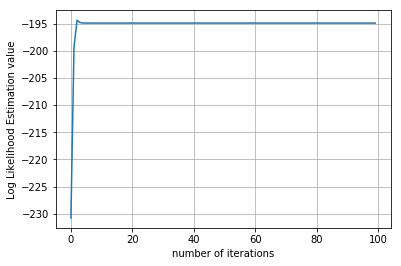

In [65]:
convergedprocedure_Likelihood        
plt.plot(convergedprocedure_Likelihood)
plt.xlabel("number of iterations")
plt.ylabel("Log Likelihood Estimation value")
plt.grid()

<b> Figure 1. Log-likelihood estimates changes according to iterations

Text(0,0.5,u'Differences')

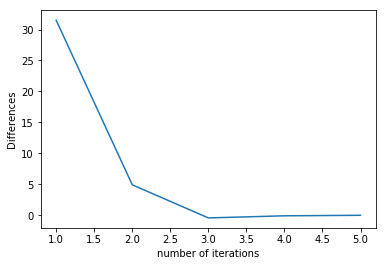

In [44]:
diffvalue = 0.0
diff = [None]

for i in range(0,len(convergedprocedure_Likelihood)):
    if i ==0:
        tempdiffvalue = convergedprocedure_Likelihood[i]
        tempvalue = convergedprocedure_Likelihood[i]
    else:
        tempdiffvalue = convergedprocedure_Likelihood[i]-tempvalue
        tempvalue = convergedprocedure_Likelihood[i]
        diff.append(tempdiffvalue)
plt.plot(diff)
plt.xlabel("number of iterations")
plt.ylabel("Differences")

<b> Figure 2.Log likelihood estimates value differences

<b> Table 4. Final values 

In [45]:
tempmatrix

,U_bus,U_car,exp_U_bus,exp_U_car,mode,Pr_car,Pr_bus,F0,F1,dF0pdtheta0,dF0pdtheta1,dF1pdtheta0,dF1pdtheta1,likelihood
0,-0.233683,-3.047078,0.791613,0.047498,Bus,0.056605,0.943395,-0.056605,-2.745324,-0.053401,2.589926,-2.589926,-125.611417,6.327839
1,-1.513629,-0.455320,0.220110,0.634245,Bus,0.742367,0.257633,-0.742367,18.113764,-0.191258,-4.666697,4.666697,-113.867395,2.424269
2,-4.615242,-0.455320,0.009900,0.634245,Car,0.984631,0.015369,0.015369,-1.272544,-0.015133,-1.252986,1.252986,-103.747258,9.685803
3,-1.678270,-3.222340,0.186697,0.039862,Bus,0.175944,0.824056,-0.175944,-4.328230,-0.144988,3.566703,-3.566703,-87.740883,8.122950
4,-1.072818,-2.988657,0.342043,0.050355,Bus,0.128326,0.871674,-0.128326,-4.055110,-0.111859,3.534733,-3.534733,-111.697560,7.050132
5,-4.843614,-0.248191,0.007879,0.780211,Car,0.990003,0.009997,0.009997,-0.909728,-0.009897,-0.900633,0.900633,-81.957601,9.935419
6,-4.232851,-1.703400,0.014511,0.182063,Car,0.926181,0.073819,0.073819,-3.845979,-0.068370,-3.562072,3.562072,-185.583932,10.169102
7,-0.116842,-5.012141,0.889726,0.006657,Bus,0.007426,0.992574,-0.007426,-0.651270,-0.007371,0.646434,-0.646434,-56.692229,10.141123
8,-1.301190,-2.441626,0.272208,0.087019,Bus,0.242240,0.757760,-0.242240,-4.118085,-0.183560,3.120519,-3.120519,-53.048822,6.184443
9,-2.310276,-5.283001,0.099234,0.005077,Bus,0.048673,0.951327,-0.048673,-2.506681,-0.046304,2.384673,-2.384673,-122.810637,12.876277
